<a href="https://colab.research.google.com/github/kellerdevin/Retail-Store/blob/main/Retail_DMA_Regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split # simple TT split cv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kellerdevin/Retail-Store/main/Retail_Data_Final.csv")

In [ ]:
df.dtypes

DMA                           object
Income before taxes            int64
Age of reference person      float64
People                       float64
Children under 18            float64
                              ...   
Asian                          int64
Hawaiian/Pacific Islander      int64
Other Race                     int64
Multi-Race                     int64
Hispanic                       int64
Length: 72, dtype: object

In [ ]:
df

,DMA,Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,...,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic
0,Anchorage,96094,49.1,2.6,0.6,0.3,1.5,2.5,60,71606,...,36.41,109.79,305538,19141,23463,30751,4389,1070,42575,34155
1,Atlanta,90502,47.7,2.7,0.8,0.3,1.4,1.8,61,62250,...,31.32,94.57,3637619,2135064,13996,376766,2584,23444,119742,741050
2,Baltimore,91988,52.1,2.5,0.6,0.4,1.4,1.9,70,69126,...,37.64,114.21,1757353,832437,7196,167623,1278,3179,68393,166900
3,Boston,95276,49.6,2.2,0.5,0.4,1.3,1.6,55,74316,...,41.05,124.68,4958971,470299,8963,464940,1351,37039,105921,639989
4,Chicago,76639,49.9,2.5,0.6,0.4,1.3,1.6,63,60582,...,35.34,107.30,5172037,1607623,14084,640235,2073,13959,152385,2103544
5,Dallas-Ft.Worth,78842,46.9,2.5,0.6,0.2,1.4,1.6,53,63207,...,33.22,100.11,3993609,1203746,33169,502550,6372,15190,136839,2210533
6,Denver,105790,46.7,2.5,0.6,0.3,1.5,2.0,62,74088,...,35.95,108.52,3108802,188034,21410,161234,3649,12394,91422,960115
7,Detroit,80928,52.9,2.4,0.5,0.4,1.3,1.9,66,60183,...,30.86,93.80,3294702,1011116,13578,224770,928,4931,105921,221980
8,Honolulu,93672,53.0,2.7,0.6,0.5,1.4,1.7,54,65099,...,35.87,108.84,315779,29473,2598,524334,101863,1658,310985,144667
9,Houston,80250,46.8,2.8,0.8,0.3,1.4,1.7,59,67304,...,33.86,102.06,2804395,1233812,18094,543532,3474,18175,100138,2618888


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['DMA', 'Income before taxes', 'Age of reference person', 'People',
       'Children under 18', 'Adults 65 and older', 'Earners', 'Vehicles',
       'Percent homeowner', 'Average annual expenditures', 'Food',
       'Food at home', 'Cereals and bakery products',
       'Meats, poultry, fish, and eggs', 'Dairy products',
       'Fruits and vegetables', 'Other food at home', 'Food away from home',
       'Alcoholic beverages', 'Housing', 'Shelter', 'Owned dwellings',
       'Rented dwellings', 'Other lodging',
       'Utilities, fuels, and public services', 'Household operations',
       'Housekeeping supplies', 'Household furnishings and equipment',
       'Apparel and services', 'Transportation',
       'Vehicle purchases (net outlay)',
       'Gasoline, other fuels, and motor oil', 'Other vehicle expenses',
       'Public and other transportation', 'Healthcare', 'Entertainment',
       'Personal care products and services', 'Reading', 'Education',
       'Tobacco products and sm

In [ ]:
features = ['Income before taxes', 'Age of reference person'
        , 'Earners', 'Vehicles', 'Average annual expenditures',
        'Housing',  'Owned dwellings', 'Other lodging',
       'Public and other transportation', 'Healthcare', 'Entertainment',
       'Personal care products and services', 'Reading', 'Education',
       'Cash contributions', 'Personal insurance and pensions',
       'Med HHld Income', 'HHlds No Vehicles', 'HHlds 1-2 Vehicles',
       'HHlds 2+ Vehicles', 'HHld Exp - Public Transport', 'HHld Exp - Other Public Transportation', 'White',
       'African American'

       ]
target = "Average Weekly"

In [ ]:
df.describe

<bound method NDFrame.describe of                 DMA  Income before taxes  Age of reference person  People  \
4           Chicago                76639                     49.9     2.5   
5   Dallas-Ft.Worth                78842                     46.9     2.5   
6            Denver               105790                     46.7     2.5   
9           Houston                80250                     46.8     2.8   
10      Los Angeles                76471                     49.8     2.8   
14     Philadelphia                88974                     53.3     2.4   
16        San Diego                99931                     49.2     2.7   
18          Seattle               117844                     47.9     2.4   
20   Tampa-St. Pete                60340                     54.4     2.2   

    Children under 18  Adults 65 and older  Earners  Vehicles  \
4                 0.6                  0.4      1.3       1.6   
5                 0.6                  0.2      1.4       1.6   


In [ ]:
X = df[features]
y = df[target]
y

4     14769.00
5     16387.31
6     10760.14
9     22827.14
10    17109.00
14    20070.58
16    13247.42
18    13247.42
20    20844.95
Name: Average Weekly, dtype: float64

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(df[features], df['Average Weekly'], test_size=0.1, random_state=42)


In [ ]:
train_targets

5     16387.31
14    20070.58
4     14769.00
20    20844.95
6     10760.14
10    17109.00
9     22827.14
16    13247.42
Name: Average Weekly, dtype: float64

In [ ]:
test_targets

18    13247.42
Name: Average Weekly, dtype: float64

Normalizing the data

In [ ]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Model Definition

In [ ]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu',))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

K-fold validation

In [ ]:
import numpy as np
k=4
model = build_model()
num_val_samples = len(train_data) // k
num_epochs = 60
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
num_epochs = 60
all_mae_histories = []
model = build_model()
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[5757.48779296875, 5139.935546875, 1650.98486328125, 221.27685546875]

In [ ]:
np.mean(all_scores)

3192.4212646484375

Off by 18% on average

In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

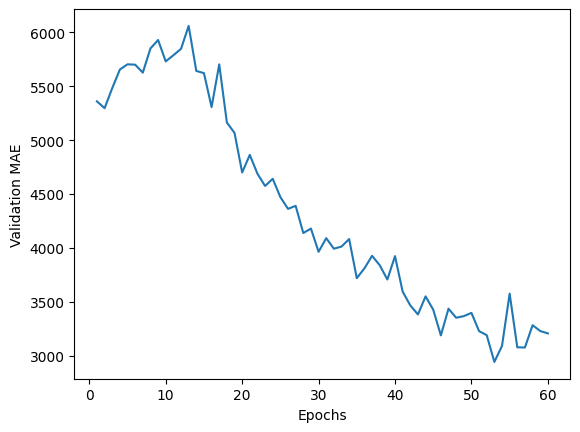

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

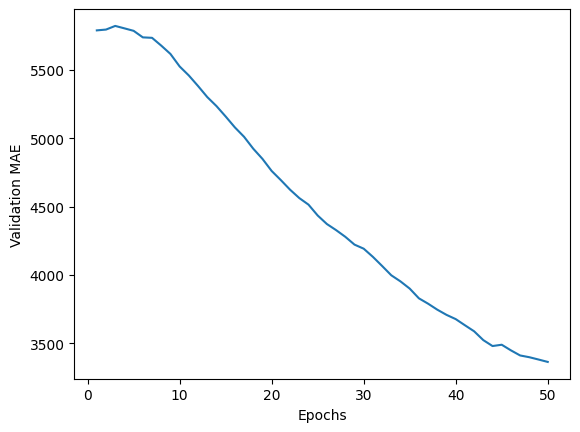

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
  epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

1/1 [==============================] - 0s 354ms/step - loss: 1153069.1250 - mae: 1073.8105


In [ ]:
test_mae_score

1073.810546875

##3765

In [ ]:
df_pred = pd.read_csv("https://raw.githubusercontent.com/kellerdevin/Retail-Store/main/Retail_DMA_Pred.csv")

In [ ]:
pd.set_option('display.max_columns', 65)
df_pred

,DMA,Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,Food,Food at home,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy products,Fruits and vegetables,Other food at home,Food away from home,Alcoholic beverages,Housing,Shelter,Owned dwellings,Rented dwellings,Other lodging,"Utilities, fuels, and public services",Household operations,Housekeeping supplies,Household furnishings and equipment,Apparel and services,Transportation,Vehicle purchases (net outlay),"Gasoline, other fuels, and motor oil",Other vehicle expenses,Public and other transportation,Healthcare,Entertainment,Personal care products and services,Reading,Education,Tobacco products and smoking supplies,Miscellaneous,Cash contributions,Personal insurance and pensions,Life and other personal insurance,Pensions and Social Security,Area,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic
0,Anchorage,96094,49.1,2.6,0.6,0.3,1.5,2.5,60,71606,8306,5284,655,1073,502,992,2062,3022,788,23039,14231,7966,5342,924,4590,1407,719,2092,1648,12446,5850,2307,2780,1510,4557,4346,778,121,1523,482,1526,1867,10179,455,9724,42779.71605,340682,168610,84630,9007,48625,110978,948.78,27.87,163.45,36.41,109.79,305538,19141,23463,30751,4389,1070,42575,34155
1,Atlanta,90502,47.7,2.7,0.8,0.3,1.4,1.8,61,62250,6683,3699,443,890,344,672,1351,2984,385,20965,12346,7292,4177,877,4363,1728,624,1904,1874,11747,5287,2494,3307,660,4447,3000,670,87,1319,222,771,1945,8136,327,7808,17797.67079,5262308,2619317,62663,144131,820362,1654824,816.73,24.00,140.76,31.32,94.57,3637619,2135064,13996,376766,2584,23444,119742,741050
2,Baltimore,91988,52.1,2.5,0.6,0.4,1.4,1.9,70,69126,8964,4443,551,956,428,1008,1499,4521,724,23247,14800,9582,4200,1018,4021,1864,654,1908,1914,11049,5491,2117,2590,851,4926,3068,861,160,1617,270,913,1502,9910,472,9439,3870.21540,2314857,1175185,78919,122409,378241,674535,981.95,28.91,168.89,37.64,114.21,1757353,832437,7196,167623,1278,3179,68393,166900
3,Boston,95276,49.6,2.2,0.5,0.4,1.3,1.6,55,74316,8264,5108,712,1033,519,1080,1764,3156,823,29015,18887,11069,6230,1588,4125,2217,629,3157,2134,8463,2961,1746,2678,1077,5261,3844,741,96,3101,344,1251,2665,8314,332,7982,9605.67610,5275113,2598094,83728,298235,890522,1409337,1070.73,31.56,184.05,41.05,124.68,4958971,470299,8963,464940,1351,37039,105921,639989
4,Chicago,76639,49.9,2.5,0.6,0.4,1.3,1.6,63,60582,8170,4518,539,977,453,954,1595,3652,509,21254,13546,8455,4209,882,3755,1417,692,1844,1987,7717,2850,1770,2323,774,5154,3328,958,129,1673,216,1034,1685,6768,303,6465,9445.52423,7362731,3695954,69122,434676,1277861,1983417,922.09,27.16,158.65,35.34,107.30,5172037,1607623,14084,640235,2073,13959,152385,2103544
5,Dallas-Ft.Worth,78842,46.9,2.5,0.6,0.2,1.4,1.6,53,63207,6571,3433,393,846,299,665,1230,3139,576,22350,13869,6646,6506,717,4182,1460,736,2103,2353,10507,4482,2117,3336,572,4479,3333,778,110,1662,230,1150,1517,7592,245,7348,26400.16519,5922749,2944691,65788,126445,942743,1875503,865.65,25.43,149.20,33.22,100.11,3993609,1203746,33169,502550,6372,15190,136839,2210533
6,Denver,105790,46.7,2.5,0.6,0.3,1.5,2.0,62,74088,8855,5057,622,1127,502,1047,1758,3798,771,25059,15452,8388,5727,1337,4015,1910,962,2720,2387,11841,5261,2028,3218,1334,6046,4340,1215,141,1430,310,1178,2397,8119,317,7802,117004.67870,3477905,1770802,72201,89766,517837,1163199,937.11,27.54,161.41,35.95,108.52,3108802,188034,21410,161234,3649,12394,91422,960115
7,Detroit,80928,52.9,2.4,0.5,0.4,1.3,1.9,66,60183,7397,4113,563,887,392,809,1463,3284,658,18794,10429,6223,3361,846,4131,1515,713,2006,2102,10426,3409,1943,4307,768,5079,3002,848,94,1531,551,977,1526,7199,546,6653,6210.8327

In [ ]:
df_pred = df_pred.dropna()

In [ ]:
X = df_pred[features]

In [ ]:
X

,Income before taxes,Age of reference person,Earners,Vehicles,Average annual expenditures,Housing,Owned dwellings,Other lodging,Public and other transportation,Healthcare,Entertainment,Personal care products and services,Reading,Education,Cash contributions,Personal insurance and pensions,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Other Public Transportation,White,African American
0,96094,49.1,1.5,2.5,71606,23039,7966,924,1510,4557,4346,778,121,1523,1867,10179,84630,9007,48625,110978,948.78,109.79,305538,19141
1,90502,47.7,1.4,1.8,62250,20965,7292,877,660,4447,3000,670,87,1319,1945,8136,62663,144131,820362,1654824,816.73,94.57,3637619,2135064
2,91988,52.1,1.4,1.9,69126,23247,9582,1018,851,4926,3068,861,160,1617,1502,9910,78919,122409,378241,674535,981.95,114.21,1757353,832437
3,95276,49.6,1.3,1.6,74316,29015,11069,1588,1077,5261,3844,741,96,3101,2665,8314,83728,298235,890522,1409337,1070.73,124.68,4958971,470299
4,76639,49.9,1.3,1.6,60582,21254,8455,882,774,5154,3328,958,129,1673,1685,6768,69122,434676,1277861,1983417,922.09,107.30,5172037,1607623
5,78842,46.9,1.4,1.6,63207,22350,6646,717,572,4479,3333,778,110,1662,1517,7592,65788,126445,942743,1875503,865.65,100.11,3993609,1203746
6,105790,46.7,1.5,2.0,74088,25059,8388,1337,1334,6046,4340,1215,141,1430,2397,8119,72201,89766,517837,1163199,937.11,108.52,3108802,188034
7,80928,52.9,1.3,1.9,60183,18794,6223,846,768,5079,3002,848,94,1531,1526,7199,59574,163801,687209,1127124,805.97,93.80,3294702,1011116
8,93672,53.0,1.4,1.7,65099,24355,6982,751,1488,3977,3285,705,77,1820,3512,6919,79293,40653,164346,285077,935.31,108.84,315779,29473
9,80250,46.8,1.4,1.7,67304,21818,7138,771,790,4517,3413,844,93,1474,2093,7177,64432,128707,865053,1634736,882.22,102.06,2804395,1233812


In [ ]:
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis=0)
X /= std


In [ ]:
X

,Income before taxes,Age of reference person,Earners,Vehicles,Average annual expenditures,Housing,Owned dwellings,Other lodging,Public and other transportation,Healthcare,Entertainment,Personal care products and services,Reading,Education,Cash contributions,Personal insurance and pensions,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Other Public Transportation,White,African American
0,0.374784,-0.449923,1.050122,2.310265,0.445201,-0.165251,-0.198958,-0.213538,1.283727,-0.585113,1.436220,-0.531040,-0.188396,-0.358142,-0.388778,1.237353,1.017529,-0.560479,-1.413214,-1.557981,0.132966,0.107926,-1.492797,-1.069707
1,0.010249,-1.039609,0.126015,-0.030398,-0.682759,-0.707352,-0.551846,-0.361328,-0.878169,-0.754164,-0.533643,-1.317179,-0.834818,-0.643031,-0.308156,-0.216078,-0.718976,-0.271446,-0.000560,0.295317,-0.746003,-0.763709,0.084074,1.418451
2,0.107120,0.813690,0.126015,0.303982,0.146212,-0.110884,0.647137,0.082042,-0.392378,-0.018023,-0.434126,0.073121,0.553088,-0.226870,-0.766044,1.045981,0.566071,-0.317910,-0.809856,-0.881463,0.353757,0.361055,-0.805742,-0.113336
3,0.321459,-0.239321,-0.798093,-0.699159,0.771919,1.396752,1.425690,1.874390,0.182432,0.496815,0.701546,-0.800365,-0.663706,1.845557,0.436042,-0.089445,0.946225,0.058186,0.127867,0.000624,0.944707,0.960662,0.709389,-0.539181
4,-0.893459,-0.112959,-0.798093,-0.699159,-0.883853,-0.631813,0.057069,-0.345606,-0.588221,0.332374,-0.053617,0.779190,-0.036296,-0.148665,-0.576894,-1.189300,-0.208388,0.350036,0.836886,0.689774,-0.044691,-0.034674,0.810220,0.798222
5,-0.749849,-1.376573,0.126015,-0.699159,-0.567383,-0.345342,-0.890075,-0.864444,-1.101989,-0.704986,-0.046300,-0.531040,-0.397532,-0.164027,-0.750540,-0.603090,-0.471943,-0.309277,0.223457,0.560230,-0.420375,-0.446438,0.252542,0.323294
6,1.006851,-1.460814,1.050122,0.638363,0.744431,0.362735,0.021990,1.085128,0.836087,1.703226,1.427439,2.649908,0.191853,-0.488018,0.159035,-0.228172,0.035009,-0.387734,-0.554327,-0.294850,0.055287,0.035194,-0.166183,-0.871102
7,-0.613865,1.150654,-0.798093,0.303982,-0.931957,-1.274807,-1.111546,-0.458807,-0.603481,0.217112,-0.530716,-0.021506,-0.701731,-0.346970,-0.741238,-0.882678,-0.963163,-0.229371,-0.244294,-0.338156,-0.817625,-0.807806,-0.078208,0.096777
8,0.216897,1.192775,0.126015,-0.364779,-0.339284,0.178724,-0.714154,-0.757532,1.227772,-1.476474,-0.116547,-1.062412,-1.024942,0.056622,1.311508,-1.081875,0.595636,-0.492787,-1.201388,-1.348985,0.043306,0.053521,-1.487951,-1.057558
9,-0.658063,-1.418693,0.126015,-0.364779,-0.073448,-0.484395,-0.632477,-0.694642,-0.547526,-0.646586,0.070780,-0.050623,-0.720743,-0.426572,-0.155182,-0.898329,-0.579136,-0.304438,0.081247,0.271203,-0.310079,-0.334764,-0.310241,0.358650


In [ ]:
predictions = model.predict(X)

1/1 [==============================] - 0s 122ms/step


In [ ]:
df_pred.loc[:, 'Predicted_Revenue'] = predictions

In [ ]:
df_pred

,DMA,Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,Food,Food at home,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy products,Fruits and vegetables,Other food at home,Food away from home,Alcoholic beverages,Housing,Shelter,Owned dwellings,Rented dwellings,Other lodging,"Utilities, fuels, and public services",Household operations,Housekeeping supplies,Household furnishings and equipment,Apparel and services,Transportation,Vehicle purchases (net outlay),"Gasoline, other fuels, and motor oil",...,Healthcare,Entertainment,Personal care products and services,Reading,Education,Tobacco products and smoking supplies,Miscellaneous,Cash contributions,Personal insurance and pensions,Life and other personal insurance,Pensions and Social Security,Area,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic,Predicted_Revenue
0,Anchorage,96094,49.1,2.6,0.6,0.3,1.5,2.5,60,71606,8306,5284,655,1073,502,992,2062,3022,788,23039,14231,7966,5342,924,4590,1407,719,2092,1648,12446,5850,2307,...,4557,4346,778,121,1523,482,1526,1867,10179,455,9724,42779.71605,340682,168610,84630,9007,48625,110978,948.78,27.87,163.45,36.41,109.79,305538,19141,23463,30751,4389,1070,42575,34155,5206.282227
1,Atlanta,90502,47.7,2.7,0.8,0.3,1.4,1.8,61,62250,6683,3699,443,890,344,672,1351,2984,385,20965,12346,7292,4177,877,4363,1728,624,1904,1874,11747,5287,2494,...,4447,3000,670,87,1319,222,771,1945,8136,327,7808,17797.67079,5262308,2619317,62663,144131,820362,1654824,816.73,24.00,140.76,31.32,94.57,3637619,2135064,13996,376766,2584,23444,119742,741050,9438.089844
2,Baltimore,91988,52.1,2.5,0.6,0.4,1.4,1.9,70,69126,8964,4443,551,956,428,1008,1499,4521,724,23247,14800,9582,4200,1018,4021,1864,654,1908,1914,11049,5491,2117,...,4926,3068,861,160,1617,270,913,1502,9910,472,9439,3870.21540,2314857,1175185,78919,122409,378241,674535,981.95,28.91,168.89,37.64,114.21,1757353,832437,7196,167623,1278,3179,68393,166900,2648.398926
3,Boston,95276,49.6,2.2,0.5,0.4,1.3,1.6,55,74316,8264,5108,712,1033,519,1080,1764,3156,823,29015,18887,11069,6230,1588,4125,2217,629,3157,2134,8463,2961,1746,...,5261,3844,741,96,3101,344,1251,2665,8314,332,7982,9605.67610,5275113,2598094,83728,298235,890522,1409337,1070.73,31.56,184.05,41.05,124.68,4958971,470299,8963,464940,1351,37039,105921,639989,6468.554688
4,Chicago,76639,49.9,2.5,0.6,0.4,1.3,1.6,63,60582,8170,4518,539,977,453,954,1595,3652,509,21254,13546,8455,4209,882,3755,1417,692,1844,1987,7717,2850,1770,...,5154,3328,958,129,1673,216,1034,1685,6768,303,6465,9445.52423,7362731,3695954,69122,434676,1277861,1983417,922.09,27.16,158.65,35.34,107.30,5172037,1607623,14084,640235,2073,13959,152385,2103544,7775.931641
5,Dallas-Ft.Worth,78842,46.9,2.5,0.6,0.2,1.4,1.6,53,63207,6571,3433,393,846,299,665,1230,3139,576,22350,13869,6646,6506,717,4182,1460,736,2103,2353,10507,4482,2117,...,4479,3333,778,110,1662,230,1150,1517,7592,245,7348,26400.16519,5922749,2944691,65788,126445,942743,1875503,865.65,25.43,149.20,33.22,100.11,3993609,1203746,33169,502550,6372,15190,136839,2210533,9666.591797
6,Denver,105790,46.7,2.5,0.6,0.3,1.5,2.0,62,74088,8855,5057,622,1127,502,1047,1758,3798,771,25059,15452,8388,5727,1337,4015,1910,962,2720,2387,11841,5261,2028,...,6046,4340,1215,141,1430,310,1178,2397,8119,317,7802,117004.67870,3477905,1770802,72201,89766,517837,1163199,937.11,27.54,161.41,35.95,108.52,3108802,188034,21410,161234,3649,12394,91422,960115,6840.470703
7,Detroit,80928,52.9,2.4,0.5,0.4,1.3,1.9,66,60183,7397,4113,563,887,392,809,1463,3284,658,18794,10429,6223,3361,846,4131,1515,713,2006,2102,10426,3409,1943,...,5079,3002,848,94,1531,551,977,1526,7199,546,6653,6

In [ ]:
# Rank DMAs by predicted annual revenue
ranked_df = df_pred.sort_values(by='Predicted_Revenue', ascending=False)

print(ranked_df[['DMA', 'Predicted_Revenue']].apply(lambda x: f"{x[0]}: {x[1]:.2f}", axis=1))

20         Tampa-St. Pete: 23793.75
13               New York: 18903.67
17          San Francisco: 14755.38
21        Washington D.C.: 14056.98
10            Los Angeles: 11344.79
11                   Miami: 9670.81
5          Dallas-Ft.Worth: 9666.59
1                  Atlanta: 9438.09
18                 Seattle: 8930.65
7                  Detroit: 8680.77
4                  Chicago: 7775.93
16               San Diego: 7707.58
9                  Houston: 7279.53
15                 Phoenix: 7062.11
6                   Denver: 6840.47
14            Philadelphia: 6669.89
3                   Boston: 6468.55
19               St. Louis: 6103.15
12    Minneapolis-St. Paul: 5736.41
0                Anchorage: 5206.28
8                 Honolulu: 4659.41
2                Baltimore: 2648.40
dtype: object


In [ ]:
# 8. Add 7502 to each predicted revenue value and format as dollars
ranked_df['Predicted_Revenue'] = (ranked_df['Predicted_Revenue'] + 2768).apply(lambda x: '${:,.2f}'.format(x))

# 9. Display the ranked DataFrame with adjusted predicted revenue values
print(ranked_df[['DMA', 'Predicted_Revenue']])


                     DMA Predicted_Revenue
20        Tampa-St. Pete        $26,561.75
13              New York        $21,671.67
17         San Francisco        $17,523.38
21       Washington D.C.        $16,824.98
10           Los Angeles        $14,112.79
11                 Miami        $12,438.81
5        Dallas-Ft.Worth        $12,434.59
1                Atlanta        $12,206.09
18               Seattle        $11,698.65
7                Detroit        $11,448.77
4                Chicago        $10,543.93
16             San Diego        $10,475.58
9                Houston        $10,047.53
15               Phoenix         $9,830.11
6                 Denver         $9,608.47
14          Philadelphia         $9,437.89
3                 Boston         $9,236.55
19             St. Louis         $8,871.15
12  Minneapolis-St. Paul         $8,504.41
0              Anchorage         $7,974.28
8               Honolulu         $7,427.41
2              Baltimore         $5,416.40
